In [1]:
from pathlib import Path
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sys
sys.path.append('..')

import training

In [2]:
df_all = pd.read_csv('../reports/architecture_investigation/results.csv')

In [3]:
df_all = df_all.sort_values(['depth', 'size', 'property', 'epoch'])

In [4]:
def get_experiment(size, depth, prop):
    return df_all[(df_all['size'] == size) & (df_all['depth'] == depth) & (df_all['property'] == prop)]

def plot_experiment(experiment, ax=None, title=None):
    if not ax:
        ax = plt.subplot(111)
    for n in range(4):
        tmp = experiment[experiment['num'] == n]
        base = tmp[~tmp['ensemble']].dropna()
        ax.plot(range(1, 16), base['smape'], c='0.5', alpha=0.5)
        ens = tmp[tmp['ensemble']].dropna()
        ax.plot(range(1, 16), ens['smape'], c='C0', alpha=0.5)
        ax.scatter([15], list(experiment[experiment['epoch'].isna()]['smape']), c='C1', marker='x')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_title(title)

## TODO: CHANGE BELOW

In [5]:
comb_dict = {'size': [128, 256],
             'depth': [2, 3],
             'property': ['batchnorm', 'dropout', 'layernorm', 'small', 'inverse']}

combs = list(training.make_runs(comb_dict))

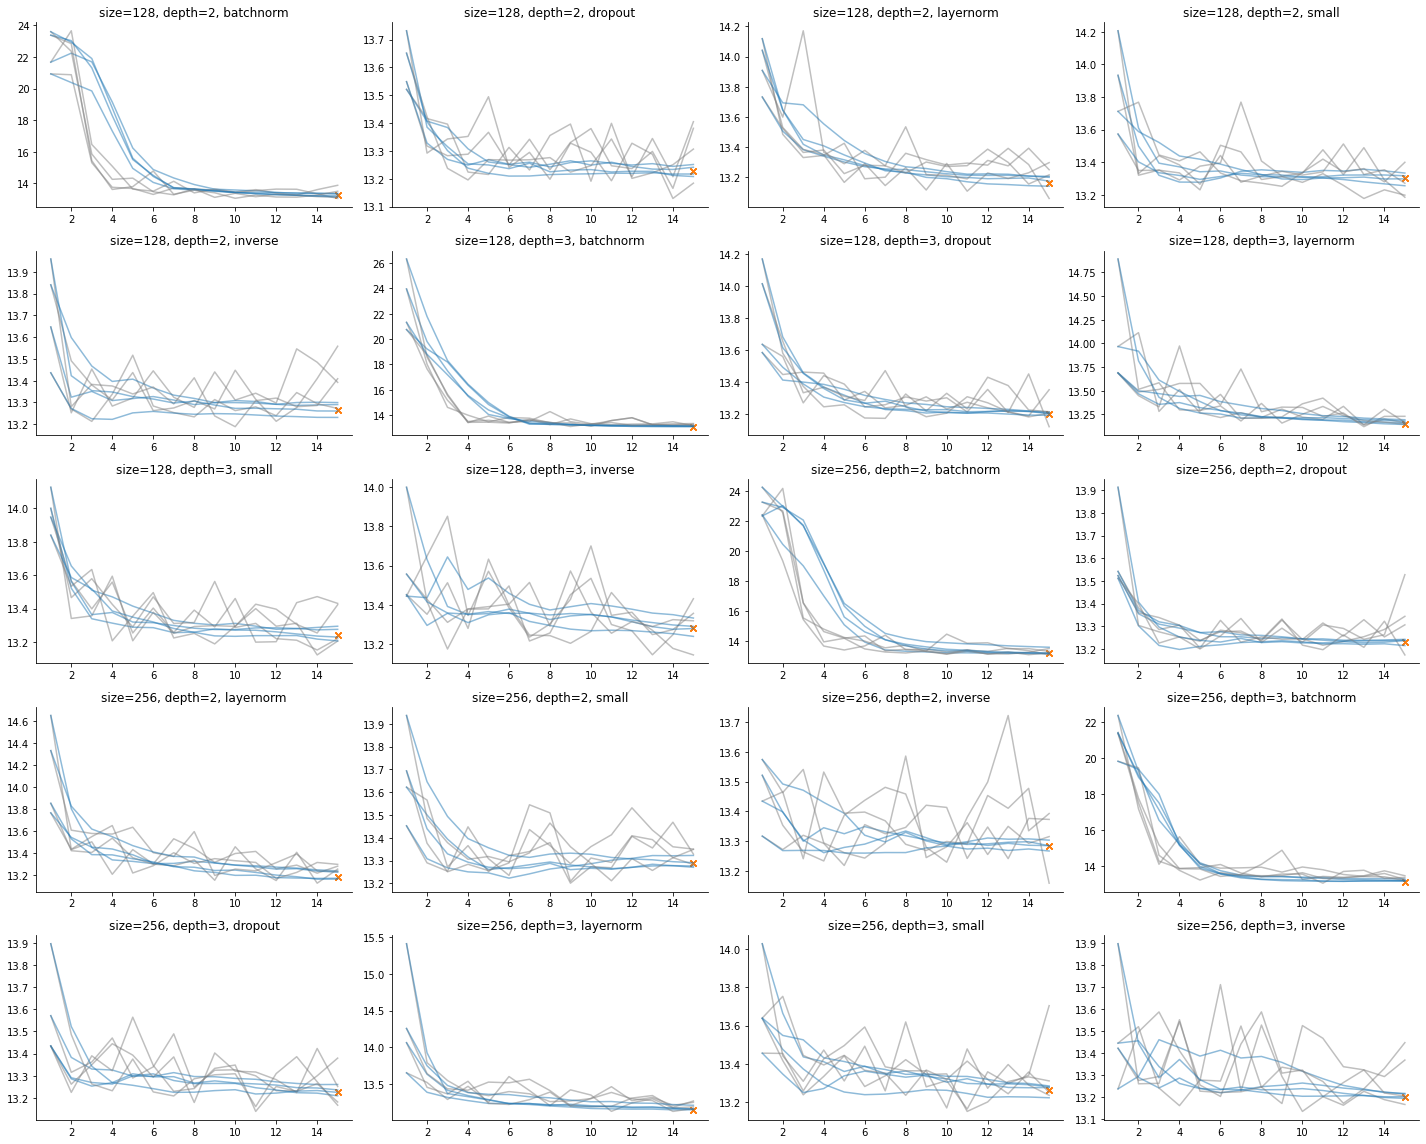

In [9]:
plt.figure(figsize=(20, 16))

for i in range(len(combs)):
    ax = plt.subplot(5, 4, i+1)
    size = combs[i]['size']
    depth = combs[i]['depth']
    prop = combs[i]['property']
    ex = get_experiment(size, depth, prop)
    title = 'size={}, depth={}, {}'.format(size, depth, prop)
    plot_experiment(ex, ax=ax, title=title)
    
plt.tight_layout()

## Aggregates

In [10]:
df_all['name'] = df_all.apply(lambda x: '{}_{}_{}'.format(x['property'], x['size'], x['depth']), axis=1)

df_last_epoch = df_all[(df_all['epoch'] == 14) & (df_all['ensemble'])]
df_final = df_all[df_all['epoch'].isna()]

(13.0, 13.3)

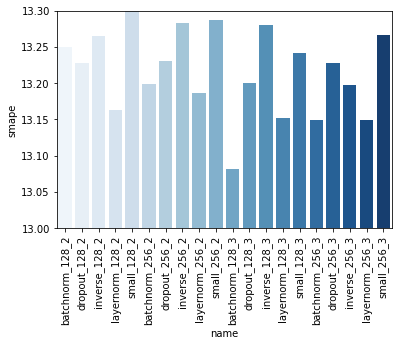

In [12]:
sns.barplot(x='name', y='smape', data=df_final, palette='Blues')
plt.xticks(rotation=90)
plt.ylim(13, 13.3)

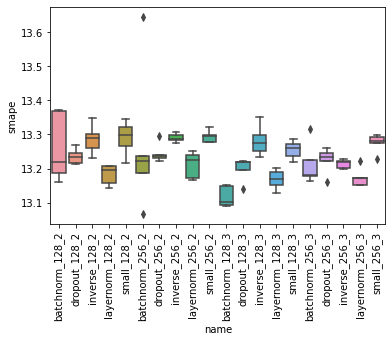

In [13]:
sns.boxplot(x='name', y='smape', data=df_last_epoch)
plt.xticks(rotation=90);

<AxesSubplot:xlabel='property', ylabel='smape'>

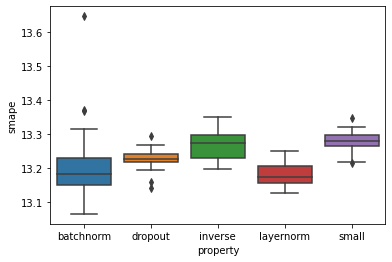

In [14]:
sns.boxplot(x='property', y='smape', data=df_last_epoch)

<AxesSubplot:xlabel='depth', ylabel='smape'>

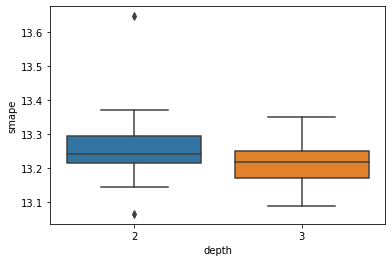

In [15]:
sns.boxplot(x='depth', y='smape', data=df_last_epoch)

<AxesSubplot:xlabel='size', ylabel='smape'>

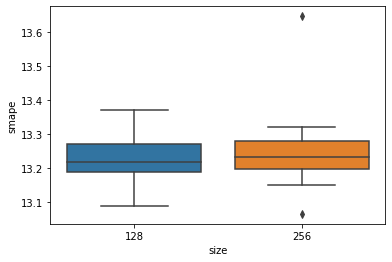

In [16]:
sns.boxplot(x='size', y='smape', data=df_last_epoch)

Text(0.5, 1.0, 'depth = 3')

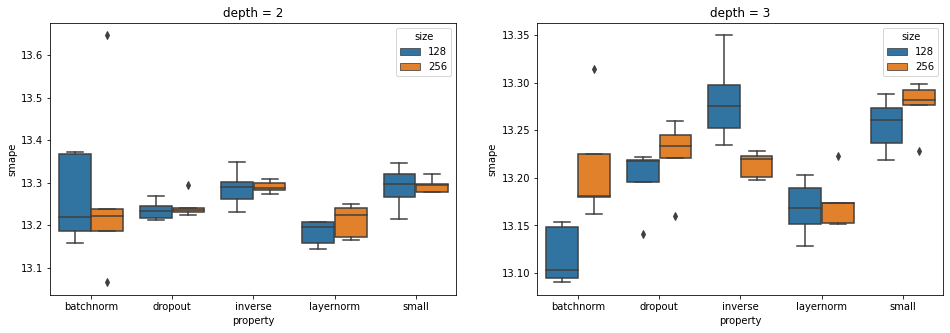

In [21]:
plt.figure(figsize=(16, 5))

ax = plt.subplot(121)
sns.boxplot(x='property', y='smape', data=df_last_epoch[df_last_epoch['depth'] == 2], hue='size', ax=ax)
ax.set_title('depth = 2')


ax = plt.subplot(122)
sns.boxplot(x='property', y='smape', data=df_last_epoch[df_last_epoch['depth'] == 3], hue='size', ax=ax)
ax.set_title('depth = 3')

Text(0.5, 1.0, 'depth = 3')

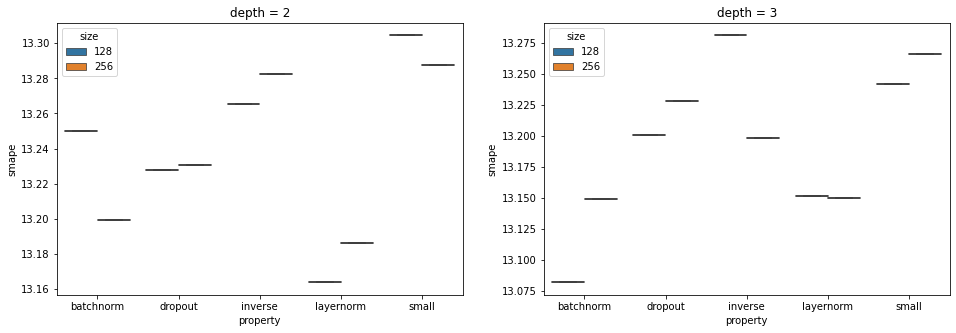

In [25]:
plt.figure(figsize=(16, 5))

ax = plt.subplot(121)
sns.boxplot(x='property', y='smape', data=df_final[df_final['depth'] == 2], hue='size', ax=ax)
ax.set_title('depth = 2')


ax = plt.subplot(122)
sns.boxplot(x='property', y='smape', data=df_final[df_final['depth'] == 3], hue='size', ax=ax)
ax.set_title('depth = 3')